In [1]:
# pip install geopandas

In [2]:
# conda install geopandas

In [3]:
#import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
# from geodatasets import get_path
from shapely import wkt
from shapely.geometry import Point

In [4]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [5]:
cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

C:\Users\mered\AppData\Local\Temp\ipykernel_29424\2776292494.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


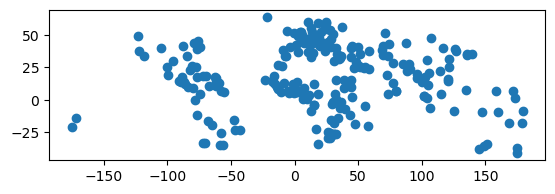

In [6]:
cities.plot()
plt.show()

In [7]:
# Increase number of rows/columns that will be visible
pd.set_option('display.max_columns', 45)
pd.set_option('display.max_rows', 45)

In [8]:
# Read in data set
denver_full = pd.read_csv('denver_09.23_listings.csv')

# Add a 'city' column
denver_full['city'] = 'Denver'

# Check dataframe
denver_full.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,...,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,city
0,360,https://www.airbnb.com/rooms/360,20230924144343,2023-09-24,city scrape,Guesthouse in Denver · ★4.99 · 2 bedrooms · 2 ...,Enjoy the famous Colorado weather and unplug i...,The cottage is located in the center of Lower ...,https://a0.muscache.com/pictures/monet/Select-...,666,https://www.airbnb.com/users/show/666,Jennifer & Giovanni,2008-07-08,"Denver, CO",We are artists and tinkerers.\r\n \r\nWe enjoy...,within an hour,100%,97%,t,https://a0.muscache.com/im/users/666/profile_p...,https://a0.muscache.com/im/users/666/profile_p...,Highland,...,147,2023-09-24,179,7,0,2018-08-13,2023-08-05,4.99,4.99,4.96,5.00,5.00,5.00,4.91,2017-BFN-0002177,f,2,2,0,0,2.87,Denver
1,364,https://www.airbnb.com/rooms/364,20230924144343,2023-09-24,city scrape,Loft in Denver · ★4.85 · 1 bedroom · 1 bed · 1...,"Modern 1,000 square foot loft in the heart of ...","Ten brewpubs within walking distance, two grea...",https://a0.muscache.com/pictures/11766413/a2c5...,783,https://www.airbnb.com/users/show/783,Jason,2008-07-11,"Denver, CO","I travel pretty frequently, I spend a lot of t...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/783/profile_p...,https://a0.muscache.com/im/users/783/profile_p...,Five Points,...,358,2023-09-24,87,0,0,2009-05-18,2016-04-26,4.85,4.78,4.81,4.95,4.96,4.65,4.71,NaN,f,1,1,0,0,0.50,Denver
2,590,https://www.airbnb.com/rooms/590,20230924144343,2023-09-24,city scrape,Home in Denver · ★4.85 · 1 bedroom · 1 bed · 1...,"Large guest room in my home, where I also live...",I love the diversity of my neighborhood and it...,https://a0.muscache.com/pictures/d84d5bc6-f7cb...,933,https://www.airbnb.com/users/show/933,Jill,2008-07-21,"Denver, CO",I am friendly and I love meeting people from a...,within an hour,100%,95%,t,https://a0.muscache.com/im/users/933/profile_p...,https://a0.muscache.com/im/users/933/profile_p...,North Park Hill,...,233,2023-09-24,712,43,2,2009-03-29,2023-08-27,4.85,4.78,4.58,4.93,4.95,4.76,4.85,2021-BFN-0000578,f,2,0,2,0,4.04,Denver
3,592,https://www.airbnb.com/rooms/592,20230924144343,2023-09-24,city scrape,Home in Denver · ★4.87 · 1 bedroom · 1 bed · 1...,This room is in the basement. It does not hav...,NaN,https://a0.muscache.com/pictures/ba522ff9-84c9...,933,https://www.airbnb.com/users/show/933,Jill,2008-07-21,"Denver, CO",I am friendly and I love meeting people from a...,within an hour,100%,95%,t,https://a0.muscache.com/im/users/933/profile_p...,https://a0.muscache.com/im/users/933/profile_p...,North Park Hill,...,158,2023-09-24,168,1,0,2009-02-21,2023-06-24,4.87,4.75,4.55,4.94,4.94,4.81,4.86,2021-BFN-0000578,f,2,0,2,0,0.95,Denver
4,686,https://www.airbnb.com/rooms/686,20230924144343,2023-09-24,city scrape,Home in Denver · ★4.76 · 1 bedroom · 2 beds · ...,Thanks for visiting my Queen Bed Room site for...,"I love my Uptown neighborhood, which is within...",https://a0.muscache.com/pictures/108112/e6d5d3...,990,https://www.airbnb.com/users/show/990,Alexandra,2008-07-23,"Denver, CO","Denver native, former teacher, musician, chapl...",within a few hours,100%,100%,t,https://a0.muscache.com/im/pictures/user/c7c05...,https://a0.muscache.com/im/pictures/user/c7c05...,North Capitol Hill,...,288,2023-09-24,256,0,0,2008-08-28,2021-07-16,4.7

In [25]:
# Columns to remove

list_columns_to_remove = ["listing_url", "scrape_id", "last_scraped", "source", "name","neighborhood_overview", "picture_url", "host_url", "host_name", "host_about", "host_thumbnail_url",
                          "host_picture_url", "host_listings_count", "host_total_listings_count", "host_neighbourhood", "host_verifications", "neighbourhood", "neighbourhood_group_cleansed", "bathrooms",
                          "minimum_nights", "maximum_nights",  "maximum_minimum_nights", "minimum_minimum_nights", "minimum_maximum_nights",
                          "maximum_maximum_nights", "minimum_nights_avg_ntm", "maximum_nights_avg_ntm", "calendar_updated", "calendar_last_scraped",
                          "first_review", "last_review", "license", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms",
                          "calculated_host_listings_count_shared_rooms"]

# Subset dropped columns

denver = denver_full.drop(columns=list_columns_to_remove)
denver.head()

,id,description,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms_text,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,city
0,360,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,1 bath,2.0,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",$90.00,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2.87,Denver
1,364,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.5 baths,1.0,1.0,"[""First aid kit"", ""Fire extinguisher"", ""Wifi"",...",$179.00,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,0.50,Denver
2,590,"Large guest room in my home, where I also live...",933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,1 shared bath,NaN,1.0,"[""First aid kit"", ""Cooking basics"", ""Dishwashe...",$64.00,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,4.04,Denver
3,592,This room is in the basement. It does not hav...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,1 shared bath,NaN,1.0,"[""Dishwasher"", ""Cooking basics"", ""Stove"", ""Fir...",$57.00,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,0.95,Denver
4,686,Thanks for visiting my Queen Bed Room site for...,990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,1 private bath,NaN,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",$33.00,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,1.39,Denver


In [26]:
# row count
num_rows = len(denver)
print(f"Number of rows in denver is: {num_rows}")

Number of rows in denver is: 5388


In [11]:
# check that amenities column has data. Initially started with data scraped at 12.23, but it did not include amenities
# data, so reverted to 09.23 dataset.
# denver['amenities'].head()

In [12]:
# remove $ and commas in price column
denver['price'] = denver['price'].replace('[\$,]', '', regex=True).astype(float)

denver['price'].head()


0     90.0
1    179.0
2     64.0
3     57.0
4     33.0
Name: price, dtype: float64

In [13]:
# in 'bathrooms_text' column convert various 'half-bath' wording with .5 to be able to have a numeric value for number of bathrooms
# split bathrooms_text column into 2 columns to separate number and words, use RegEx to parse numbers from words
# convert new 'bath_number' column to float data type

denver['bathrooms_text'] = denver['bathrooms_text'].replace({'Half-bath': '.5 bath ', 'Private half-bath': '.5 private bath', 'Shared half-bath': '.5 shared bath'})
denver[['bath_number', 'bath_text']] = denver['bathrooms_text'].str.split(r'(\d+\.?\d*)', n=1, expand=True).iloc[:, 1:3]
denver['bath_number'] = denver['bath_number'].astype(float)

# denver.head()

In [14]:
denver['bathrooms_text'].value_counts()

bathrooms_text
1 bath              2777
2 baths              838
2.5 baths            351
1 private bath       338
1.5 baths            270
1 shared bath        218
3 baths              167
3.5 baths            164
4 baths               61
1.5 shared baths      51
2 shared baths        46
4.5 baths             36
0 baths               32
5 baths               10
5.5 baths              7
4 shared baths         5
6 baths                3
6.5 baths              3
17 shared baths        2
.5 bath                2
2.5 shared baths       2
3 shared baths         2
9.5 baths              1
Name: count, dtype: int64

In [15]:
# Drop bathrooms_text column as the data has been parsed into new columns
denver = denver.drop(columns='bathrooms_text')
# denver.head()

In [16]:
###############################################################################################################
# Creating Geometry

In [17]:
# Create geometry column for listing location

denver['listing_geometry'] = denver.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

geodf = gpd.GeoDataFrame(denver, geometry="listing_geometry")
geodf.head()

,id,description,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city,bath_number,bath_text,listing_geometry
0,360,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,2.0,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",90.0,t,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver,1.0,bath,POINT (-105.00210 39.76641)
1,364,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.0,1.0,"[""First aid kit"", ""Fire extinguisher"", ""Wifi"",...",179.0,t,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver,1.5,baths,POINT (-104.97906 39.76672)
2,590,"Large guest room in my home, where I also live...",933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,NaN,1.0,"[""First aid kit"", ""Cooking basics"", ""Dishwashe...",64.0,t,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver,1.0,shared bath,POINT (-104.91109 39.75511)
3,592,This room is in the basement. It does not hav...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,NaN,1.0,"[""Dishwasher"", ""Cooking basics"", ""Stove"", ""Fir...",57.0,t,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver,1.0,shared bath,POINT (-104.91106 39.75481)
4,686,Thanks for visiting my Queen Bed Room site for...,990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,NaN,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",33.0,t,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver,1.0,private bath,POINT (-104.97838 39.74695)


In [18]:
# Create variables for test attraction and lat/long coordinates, converted to decimal format.
attract1 = "union_station"
lat1 = 39.75305556
long1 = -105.000000

# Create columns with fixed values for above variables
denver['attraction1'] = attract1


denver.head()

,id,description,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,...,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city,bath_number,bath_text,listing_geometry,attraction1
0,360,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,2.0,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",...,4,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver,1.0,bath,POINT (-105.0020980834961 39.76641464233398),union_station
1,364,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.0,1.0,"[""First aid kit"", ""Fire extinguisher"", ""Wifi"",...",...,23,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver,1.5,baths,POINT (-104.97906 39.76672),union_station
2,590,"Large guest room in my home, where I also live...",933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,NaN,1.0,"[""First aid kit"", ""Cooking basics"", ""Dishwashe...",...,5,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver,1.0,shared bath,POINT (-104.91109 39.75511),union_station
3,592,This room is in the basement. It does not hav...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,NaN,1.0,"[""Dishwasher"", ""Cooking basics"", ""Stove"", ""Fir...",...,0,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver,1.0,shared bath,POINT (-104.91106 39.75481),union_station
4,686,Thanks for visiting my Queen Bed Room site for...,990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,NaN,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",...,0,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver,1.0,private bath,POINT (-104.97838 39.74695),union_station


In [19]:
# denver.info()

In [20]:
# Create geometry column for attraction 1

point_geometry = Point(long1, lat1)
points_geo_series = gpd.GeoSeries([point_geometry] * len(denver), crs = "EPSG:4326")
geodf = gpd.GeoDataFrame(denver, geometry=points_geo_series)
geodf = geodf.rename(columns={'geometry': 'attract1_geometry'})

geodf.head()

,id,description,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,reviews_per_month,city,bath_number,bath_text,listing_geometry,attraction1,attract1_geometry
0,360,Enjoy the famous Colorado weather and unplug i...,666,2008-07-08,"Denver, CO",within an hour,100%,97%,t,3,4,t,t,Highland,39.766415,-105.002098,Entire guesthouse,Entire home/apt,3,2.0,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",...,27,57,147,179,7,0,4.99,4.99,4.96,5.00,5.00,5.00,4.91,f,2,2.87,Denver,1.0,bath,POINT (-105.0020980834961 39.76641464233398),union_station,POINT (-105.00000 39.75306)
1,364,"Modern 1,000 square foot loft in the heart of ...",783,2008-07-11,"Denver, CO",NaN,NaN,NaN,f,1,1,t,t,Five Points,39.766720,-104.979060,Entire loft,Entire home/apt,3,1.0,1.0,"[""First aid kit"", ""Fire extinguisher"", ""Wifi"",...",...,53,83,358,87,0,0,4.85,4.78,4.81,4.95,4.96,4.65,4.71,f,1,0.50,Denver,1.5,baths,POINT (-104.97906 39.76672),union_station,POINT (-105.00000 39.75306)
2,590,"Large guest room in my home, where I also live...",933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.755110,-104.911090,Private room in home,Private room,3,NaN,1.0,"[""First aid kit"", ""Cooking basics"", ""Dishwashe...",...,27,53,233,712,43,2,4.85,4.78,4.58,4.93,4.95,4.76,4.85,f,2,4.04,Denver,1.0,shared bath,POINT (-104.91109 39.75511),union_station,POINT (-105.00000 39.75306)
3,592,This room is in the basement. It does not hav...,933,2008-07-21,"Denver, CO",within an hour,100%,95%,t,2,2,t,t,North Park Hill,39.754810,-104.911060,Private room in home,Private room,2,NaN,1.0,"[""Dishwasher"", ""Cooking basics"", ""Stove"", ""Fir...",...,0,0,158,168,1,0,4.87,4.75,4.55,4.94,4.94,4.81,4.86,f,2,0.95,Denver,1.0,shared bath,POINT (-104.91106 39.75481),union_station,POINT (-105.00000 39.75306)
4,686,Thanks for visiting my Queen Bed Room site for...,990,2008-07-23,"Denver, CO",within a few hours,100%,100%,t,2,4,t,t,North Capitol Hill,39.746950,-104.978380,Private room in home,Private room,2,NaN,2.0,"[""Extra pillows and blankets"", ""First aid kit""...",...,0,13,288,256,0,0,4.76,4.75,4.80,4.86,4.91,4.87,4.81,f,2,1.39,Denver,1.0,private bath,POINT (-104.97838 39.74695),union_station,POINT (-105.00000 39.75306)


In [22]:
# Create geometry column for geometric object of attraction 1 if the lat/long are in separate columns

# denver['attraction1_geometry'] = denver.apply(lambda row: Point(row['long1'], row['lat1']), axis=1)

# geodf = gpd.GeoDataFrame(denver, geometry="attraction1_geometry")
# geodf.head()

In [ ]:
##################################################################################################
# Scaling and Transforming Data

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a list of columns with true/false data to be transformed using OneHotEncoder
true_false = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "has_availability", "instant_bookable"]

In [29]:
# Create a list of column names for numeric data types to prepare to use StandardScaler.
num_cols_df = geodf.select_dtypes(include = 'number')

num_cols_names = num_cols_df.columns.tolist()

print(num_cols_names)

['id', 'host_id', 'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bedrooms', 'beds', 'price', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month', 'bath_number']


In [30]:
# Use list comprehension to remove some of the numeric columns

cols_to_excl = ['id', 'host_id', 'latitude', 'longitude', 'lat1', 'long1']

filtered_col_names = [col for col in num_cols_names if col not in cols_to_excl]

print(filtered_col_names)

['host_listings_count', 'host_total_listings_count', 'accommodates', 'bedrooms', 'beds', 'price', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'reviews_per_month', 'bath_number']


In [32]:
# Apply preprocessing steps selectively across different column types using ColumnTransformer from scikit-learn

preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), filtered_col_names),
        ('bool', OneHotEncoder(drop='if_binary'), true_false)])

denver_transformed = preprocessor.fit_transform(geodf)

denver_transformed

array([[-0.20515779, -0.20915775, -0.43801535, ...,  1.        ,
         1.        ,  0.        ],
       [-0.20806513, -0.21254741, -0.43801535, ...,  1.        ,
         1.        ,  0.        ],
       [-0.20661146, -0.21141752, -0.43801535, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.20806513, -0.21254741, -0.8221968 , ...,  1.        ,
         1.        ,  0.        ],
       [-0.20806513, -0.21254741, -0.8221968 , ...,  1.        ,
         1.        ,  1.        ],
       [-0.13102068, -0.15266343, -0.8221968 , ...,  1.        ,
         1.        ,  0.        ]])

In [34]:
# get transformed feature names

transformed_feature_names = preprocessor.get_feature_names_out()

transformed_feature_names

array(['num__host_listings_count', 'num__host_total_listings_count',
       'num__accommodates', 'num__bedrooms', 'num__beds', 'num__price',
       'num__availability_30', 'num__availability_60',
       'num__availability_90', 'num__availability_365',
       'num__number_of_reviews', 'num__number_of_reviews_ltm',
       'num__number_of_reviews_l30d', 'num__review_scores_rating',
       'num__review_scores_accuracy', 'num__review_scores_cleanliness',
       'num__review_scores_checkin', 'num__review_scores_communication',
       'num__review_scores_location', 'num__review_scores_value',
       'num__calculated_host_listings_count', 'num__reviews_per_month',
       'num__bath_number', 'bool__host_is_superhost_f',
       'bool__host_is_superhost_t', 'bool__host_is_superhost_nan',
       'bool__host_has_profile_pic_t', 'bool__host_identity_verified_t',
       'bool__has_availability_t', 'bool__instant_bookable_t'],
      dtype=object)

In [37]:
# convert transformed array to DataFrame

denver_transformed_df = pd.DataFrame(denver_transformed, columns=transformed_feature_names)

denver_transformed_df.head()

,num__host_listings_count,num__host_total_listings_count,num__accommodates,num__bedrooms,num__beds,num__price,num__availability_30,num__availability_60,num__availability_90,num__availability_365,num__number_of_reviews,num__number_of_reviews_ltm,num__number_of_reviews_l30d,num__review_scores_rating,num__review_scores_accuracy,num__review_scores_cleanliness,num__review_scores_checkin,num__review_scores_communication,num__review_scores_location,num__review_scores_value,num__calculated_host_listings_count,num__reviews_per_month,num__bath_number,bool__host_is_superhost_f,bool__host_is_superhost_t,bool__host_is_superhost_nan,bool__host_has_profile_pic_t,bool__host_identity_verified_t,bool__has_availability_t,bool__instant_bookable_t
0,-0.205158,-0.209158,-0.438015,0.036643,-0.14478,-0.089186,-0.631171,-0.002604,0.331489,-0.282730,1.207809,-0.341900,-0.628945,0.435255,0.411258,0.394971,0.342491,0.318843,0.535952,0.414752,-0.355138,0.385678,-0.582129,0.0,1.0,0.0,1.0,1.0,1.0,0.0
1,-0.208065,-0.212547,-0.438015,-0.881270,-0.78167,-0.039893,1.224227,1.246766,1.153714,1.354721,0.299063,-0.665727,-0.628945,0.031054,-0.265056,-0.072528,0.165970,0.187592,-0.619848,-0.125094,-0.399027,-0.729467,-0.015261,1.0,0.0,0.0,1.0,1.0,1.0,0.0
2,-0.206611,-0.211418,-0.438015,NaN,-0.78167,-0.103586,-0.533518,-0.002604,0.204993,0.384667,6.472605,1.323495,0.332677,0.031054,-0.265056,-0.789360,0.095362,0.154779,-0.256596,0.252798,-0.355138,0.936193,-0.582129,0.0,1.0,0.0,1.0,1.0,1.0,0.0
3,-0.206611,-0.211418,-0.822197,NaN,-0.78167,-0.107463,-1.021781,-1.300027,-1.471081,-0.197365,1.099154,-0.619466,-0.628945,0.088797,-0.361673,-0.882860,0.130666,0.121966,-0.091482,0.279790,-0.355138,-0.517730,-0.582129,0.0,1.0,0.0,1.0,1.0,1.0,0.0
4,-0.206611,-0.209158,-0.822197,NaN,-0.14478,-0.120756,-1.021781,-1.300027,-1.059969,0.811491,1.968389,-0.665727,-0.628945,-0.228790,-0.361673,-0.103695,-0.151767,0.023527,0.106655,0.144829,-0.355138,-0.310699,-0.582129,0.0,1.0,0.0,1.0,1.0,1.0,0.0


In [ ]:
# Use StandardScaler to scale the data. Create as separate dataframe

scaled_denv = StandardScaler().fit_transform(denver[filtered_col_names])

scaled_denv

In [ ]:
# Create dataframe with scaled data

denv_scaled_nums = pd.DataFrame(scaled_denv, columns=[filtered_col_names])

denv_scaled_nums.head()